# Google map data의 Wordcloud를 만든다.
countervecter기반으로 단순히 단어의 빈도수를 세어주기 때문에 조사나 어미등이 사라지지 않고 남아있는 한계점을 가지고 있다.
필요없는 단어들은 stopword로 지정하여 직접 제거해준다.

In [21]:
import pandas as pd

import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
import json


import numpy as np 
import pandas as pd 
from time import time
import re
import string
import os
import collections

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [12]:
# 토크나이저로 트위터 사용
from konlpy.tag import Twitter 

In [22]:
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

def get_noun(comment):
    okt = Okt()
    noun = okt.nouns(comment)
    for i,v in enumerate(noun):
            if len(v) < 2:
                    noun.pop(i)
                
    count = Counter(noun)
    noun_list = count.most_common(100)
    
    return noun_list

In [13]:
df = pd.read_csv("/home/aiffel-dj57/project/google_expo_sample.csv")
df

,name,ratings,date,comment,keyword,target
0,dm Jung,5,1년 전,평점 점을 믿을 수가 없다세기에서 세기를 지나오며세계 최대의 축제였던 엑스포요즘의 ...,세계엑스포기념품박물관,expo
1,박성균,3,1년 전,맥주축제,세계엑스포기념품박물관,expo
2,Алексе́й,5,2년 전,역대 엑스포 개최도시의 기념품과 희귀한 아이템을 한 곳에서 볼 수 있습니다,세계엑스포기념품박물관,expo
3,Robert Helvie,3,4년 전,번역 제공 남북한에 관한 흥미로운 것들 거기에서 많은 시간을 보내지 않아도됩니다 ...,세계엑스포기념품박물관,expo
4,hyung-jun kjun,1,5년 전,엑스포는 없고 너무 지루했어,세계엑스포기념품박물관,expo
...,...,...,...,...,...,...
807,J Park,1,3년 전,돈내고 입장하지 마시오그냥 밖에서 구경만,한빛탑,expo
808,H.C LEE.,5,3년 전,초딩때보고 성인이 되서 보니 또 감회가 새롭네요,한빛탑,expo
809,Henseg O,2,3년 전,단층으로 요금내고 올라가기 좀 그래요,한빛탑,expo
810,Jinsuk Kim,5,4년 전,여름에는 음악분수도 예쁘고 공연도 많이 함,한빛탑,expo


In [23]:
text = df.comment.values
#text에 comment값들을 넣어준다.

In [13]:
twitter = Twitter() 
morphs = [] 

for sentence in text: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

[[('평점', 'NNG'), ('점', 'NNG'), ('을', 'JKO'), ('믿', 'VV'), ('을', 'ETM'), ('수', 'NNB'), ('가', 'JKS'), ('없', 'VA'), ('다', 'EC'), ('세기', 'NNG'), ('에서', 'JKB'), ('세기', 'NNG'), ('를', 'JKO'), ('지나오', 'VV'), ('며', 'EC'), ('세계', 'NNG'), ('최대', 'NNG'), ('의', 'JKG'), ('축제', 'NNG'), ('였', 'VCP+EP'), ('던', 'ETM'), ('엑스포', 'NNG'), ('요즘', 'NNG'), ('의', 'JKG'), ('우리', 'NP'), ('로', 'JKB'), ('치', 'VV'), ('면', 'EC'), ('월드컵', 'NNG'), ('이나', 'JC'), ('올림픽', 'NNP'), ('의', 'JKG'), ('비즈니스', 'NNG'), ('버전', 'NNG'), ('이', 'VCP'), ('랄까', 'EC'), ('에', 'JKB'), ('대한', 'VV+ETM'), ('다양', 'XR'), ('한', 'XSA+ETM'), ('관련', 'NNG'), ('물건', 'NNG'), ('들', 'XSN'), ('과', 'JC'), ('그', 'MM'), ('배경', 'NNG'), ('들', 'XSN'), ('을', 'JKO'), ('알', 'VV+ETM'), ('수', 'NNB'), ('있', 'VV'), ('다', 'EC'), ('과거', 'NNG'), ('의', 'JKG'), ('엑스포', 'NNG'), ('는', 'JX'), ('신', 'XPN'), ('기술', 'NNG'), ('과', 'JC'), ('산업', 'NNG'), ('의', 'JKG'), ('전시회', 'NNG'), ('였', 'VCP+EP'), ('고', 'EC'), ('기업', 'NNG'), ('들', 'XSN'), ('의', 'JKG'), ('경쟁', 'NNG'), ('터', 'NNB'

In [16]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word)and("대전"not in word)and("곳"not in word): 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)
#이 과정에서 stopword를 직접 추가해준다. 
# 대전, 곳, 엑스포, 다리, 번역, 제공, 원문 등

['평점', '점', '세기', '세기', '세계', '최대', '축제', '엑스포', '요즘', '우리', '치면', '월드컵', '올림픽', '비즈니스', '버전', '랄', '대한', '관련', '물건', '그', '배경', '알', '과거', '엑스포', '기술', '산업', '전시회', '기업', '경쟁', '터', '이자', '각종', '문화', '거기', '이해', '엑스포', '대해', '더', '애', '품', '기증', '전시', '기회', '주신', '성함', '기억', '모', '진심', '감사', '여기', '일', '직원', '설명', '한번', '더', '감동', '산업', '사업', '비롯', '비즈니스', '기업', '포함', '역사', '디자인', '대해', '관심', '사람', '라면', '추천', '파리', '여행', '때', '일', '루브르', '박물관', '일', '다그', '비록', '그', '규모', '더', '현재', '초대', '기업', '존재', '꽤', '기업', '각종', '캐릭터', '패션', '브랜드', '세계', '랜드마크', '초유', '일류', '화가', '건축가', '등그', '엑스포', '영향', '영감', '사실', '기억', '추천', '기회', '또', '다단', '월요일', '휴무', '주의', '맥주', '축제', '역대', '엑스포', '개최', '도시', '기념품', '희귀', '아이템', '볼', '번역', '제공', '남북한', '관', '거기', '시간', '옆집', '과학', '공원', '위해', '폐쇄', '년', '월', '현재', '원문', '엑스포', '번역', '제공', '대개', '야외', '콘서트', '및', '엔터테인먼트', '길거리', '음식', '기념품', '지역', '판매', '조금', '더', '앞', '막대', '막대', '거리', '오후', '시', '이후', '매우', '원문', '밤', '시간', '낭만', '년', '월일', '마지막', '종료'

In [17]:
noun_adj_adv_list2=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수" not in word) and("게" not in word)and("말" not in word)and("대전" not in word)and("곳" not in word): 
            noun_adj_adv_list2.append(word) 

print(noun_adj_adv_list2)

['평점', '점', '세기', '세기', '세계', '최대', '축제', '엑스포', '요즘', '우리', '치면', '월드컵', '올림픽', '비즈니스', '버전', '랄', '대한', '관련', '물건', '그', '배경', '알', '과거', '엑스포', '기술', '산업', '전시회', '기업', '경쟁', '터', '이자', '각종', '문화', '거기', '이해', '엑스포', '대해', '더', '애', '품', '기증', '전시', '기회', '주신', '성함', '기억', '모', '진심', '감사', '여기', '일', '직원', '설명', '한번', '더', '감동', '산업', '사업', '비롯', '비즈니스', '기업', '포함', '역사', '디자인', '대해', '관심', '사람', '라면', '추천', '파리', '여행', '때', '일', '루브르', '박물관', '일', '다그', '비록', '그', '규모', '더', '현재', '초대', '기업', '존재', '꽤', '기업', '각종', '캐릭터', '패션', '브랜드', '세계', '랜드마크', '초유', '일류', '화가', '건축가', '등그', '엑스포', '영향', '영감', '사실', '기억', '추천', '기회', '또', '다단', '월요일', '휴무', '주의', '맥주', '축제', '역대', '엑스포', '개최', '도시', '기념품', '희귀', '아이템', '볼', '번역', '제공', '남북한', '관', '거기', '시간', '옆집', '과학', '공원', '위해', '폐쇄', '년', '월', '현재', '원문', '엑스포', '번역', '제공', '대개', '야외', '콘서트', '및', '엔터테인먼트', '길거리', '음식', '기념품', '지역', '판매', '조금', '더', '앞', '막대', '막대', '거리', '오후', '시', '이후', '매우', '원문', '밤', '시간', '낭만', '년', '월일', '마지막', '종료'

In [25]:
count = Counter(noun_adj_adv_list)

In [26]:
words = dict(count.most_common())

In [27]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords


In [28]:
%matplotlib inline 

import matplotlib 
from matplotlib import rc
rc('font', family='KoPubDotumBold')

In [29]:
wordcloud = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    # 한글폰트 설정. 
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

<class 'numpy.ndarray'>
(800, 800, 3)


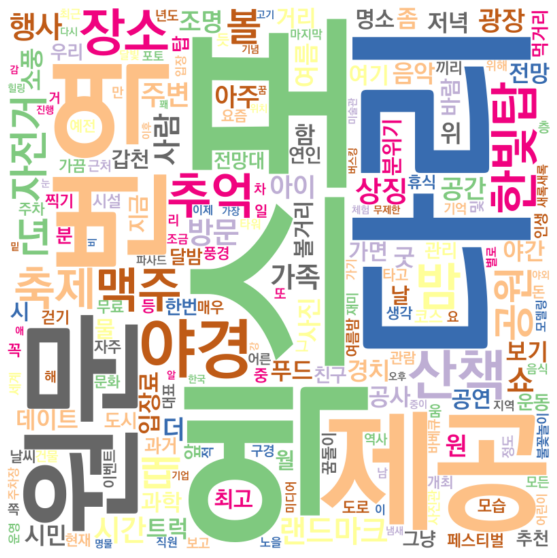

In [30]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('google_expo.png')


In [32]:
count2 = Counter(noun_adj_adv_list2)

words2 = dict(count2.most_common())

In [33]:
wordcloud2 = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words2)

<class 'numpy.ndarray'>
(800, 800, 3)


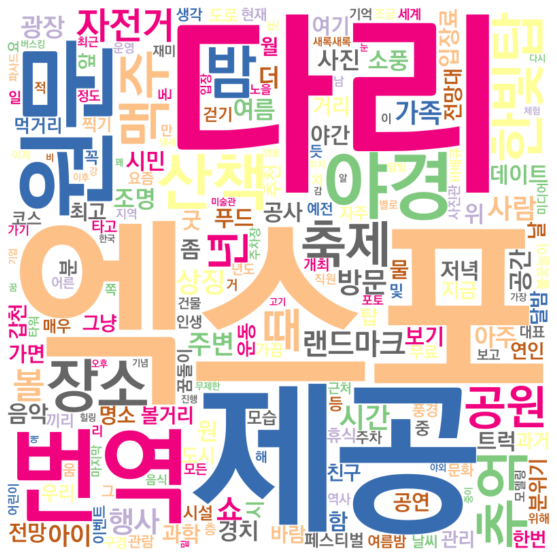

In [34]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('google_expo2.png')


In [35]:
noun_adj_adv_list3=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수" not in word) and("게" not in word)and("말" not in word)and("대전" not in word)and("곳" not in word)and("엑스포" not in word)and("다리" not in word)and("번역" not in word)and("제공" not in word)and("원문" not in word): 
            noun_adj_adv_list3.append(word) 

print(noun_adj_adv_list3)

['평점', '점', '세기', '세기', '세계', '최대', '축제', '요즘', '우리', '치면', '월드컵', '올림픽', '비즈니스', '버전', '랄', '대한', '관련', '물건', '그', '배경', '알', '과거', '기술', '산업', '전시회', '기업', '경쟁', '터', '이자', '각종', '문화', '거기', '이해', '대해', '더', '애', '품', '기증', '전시', '기회', '주신', '성함', '기억', '모', '진심', '감사', '여기', '일', '직원', '설명', '한번', '더', '감동', '산업', '사업', '비롯', '비즈니스', '기업', '포함', '역사', '디자인', '대해', '관심', '사람', '라면', '추천', '파리', '여행', '때', '일', '루브르', '박물관', '일', '다그', '비록', '그', '규모', '더', '현재', '초대', '기업', '존재', '꽤', '기업', '각종', '캐릭터', '패션', '브랜드', '세계', '랜드마크', '초유', '일류', '화가', '건축가', '등그', '영향', '영감', '사실', '기억', '추천', '기회', '또', '다단', '월요일', '휴무', '주의', '맥주', '축제', '역대', '개최', '도시', '기념품', '희귀', '아이템', '볼', '남북한', '관', '거기', '시간', '옆집', '과학', '공원', '위해', '폐쇄', '년', '월', '현재', '대개', '야외', '콘서트', '및', '엔터테인먼트', '길거리', '음식', '기념품', '지역', '판매', '조금', '더', '앞', '막대', '막대', '거리', '오후', '시', '이후', '매우', '밤', '시간', '낭만', '년', '월일', '마지막', '종료', '젠', '역사', '속', '년', '월', '일', '마지막', '월', '재', '오픈', '여름', '한번', '푸드', '트럭'

In [36]:
count3 = Counter(noun_adj_adv_list3)
words3 = dict(count3.most_common())

wordcloud3 = WordCloud(
    font_path = '/home/aiffel-dj57/Downloads/KoPubDotumBold.ttf',    
    background_color='white',                             
    colormap = 'Accent_r',                                
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words3)

<class 'numpy.ndarray'>
(800, 800, 3)


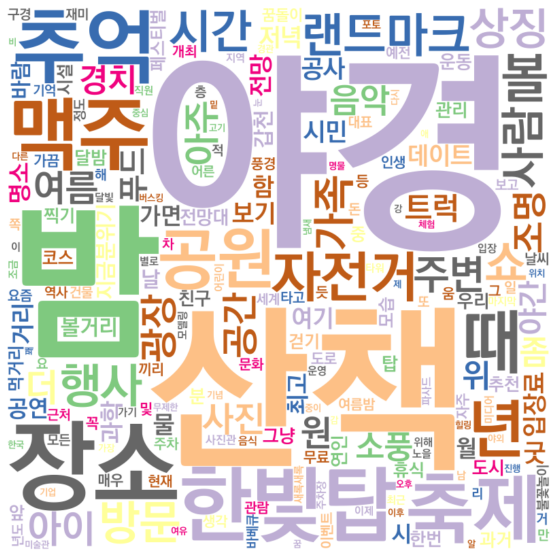

In [37]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('google_expo3.png')


# 워드 클라우드 결과
- 야경
- 밤
- 산책
- 추억
- 자전거
- 맥주
- 한빛탑
- 축제
- 공원
- 랜드마크
가 두드러지는 것을 확인할 수 있다. 